# ***Data Loading and Preprocessing***

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error






*  Load the dataset



In [ ]:
df = pd.read_csv("/content/dataset_tk.csv")
print(df.head())

            Unnamed: 0  Punjab  Haryana  Rajasthan  Delhi     UP  Uttarakhand  \
0  02/01/2019 00:00:00   119.9    130.3      234.1   85.8  313.9         40.7   
1  03/01/2019 00:00:00   121.9    133.5      240.2   85.5  311.8         39.3   
2  04/01/2019 00:00:00   118.8    128.2      239.8   83.5  320.7         38.1   
3  05/01/2019 00:00:00   121.0    127.5      239.1   79.2  299.0         39.2   
4  06/01/2019 00:00:00   121.4    132.6      240.4   76.6  286.8         39.2   

     HP   J&K  Chandigarh  ...  Odisha  West Bengal  Sikkim  \
0  30.0  52.5         5.0  ...    70.2        108.2     2.0   
1  30.1  54.1         4.9  ...    67.9        110.2     1.9   
2  30.1  53.2         4.8  ...    66.3        106.8     1.7   
3  30.2  51.5         4.3  ...    65.8        107.0     2.0   
4  31.0  53.2         4.3  ...    62.9        106.4     2.0   

   Arunachal Pradesh  Assam  Manipur  Meghalaya  Mizoram  Nagaland  Tripura  
0                2.1   21.7      2.7        6.1      1.9

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



*  Rename and parse datetime column






In [ ]:
df = df.rename(columns={'Unnamed: 0': 'DateTime'})
df['DateTime'] = pd.to_datetime(df['DateTime'], format="%d/%m/%Y %H:%M:%S")
df['Date'] = pd.to_datetime(df['DateTime']).dt.date
print(df.tail())

      DateTime  Punjab  Haryana  Rajasthan  Delhi     UP  Uttarakhand    HP  \
498 2020-12-01   130.8    126.0      220.4   77.3  322.8         36.5  25.4   
499 2020-12-02   129.4    127.3      218.4   81.3  331.4         37.0  25.8   
500 2020-12-03   132.1    129.7      205.6   85.6  336.7         37.8  26.2   
501 2020-12-04   132.1    128.4      207.0   83.9  334.6         38.2  27.0   
502 2020-12-05   120.4    111.2      201.4   83.6  287.3         35.2  24.3   

      J&K  Chandigarh  ...  West Bengal  Sikkim  Arunachal Pradesh  Assam  \
498  45.4         3.6  ...        172.6     1.4                2.1   20.4   
499  45.2         3.7  ...        174.4     1.5                2.1   23.3   
500  45.2         4.0  ...        169.8     1.4                2.1   21.7   
501  43.0         4.0  ...        145.5     1.2                2.0   24.2   
502  42.6         3.5  ...        110.4     1.2                2.1   20.3   

     Manipur  Meghalaya  Mizoram  Nagaland  Tripura        Dat




*   Check columns



In [ ]:
print(df.columns)

Index(['DateTime', 'Punjab', 'Haryana', 'Rajasthan', 'Delhi', 'UP',
       'Uttarakhand', 'HP', 'J&K', 'Chandigarh', 'Chhattisgarh', 'Gujarat',
       'MP', 'Maharashtra', 'Goa', 'DNH', 'Andhra Pradesh', 'Telangana',
       'Karnataka', 'Kerala', 'Tamil Nadu', 'Pondy', 'Bihar', 'Jharkhand',
       'Odisha', 'West Bengal', 'Sikkim', 'Arunachal Pradesh', 'Assam',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Tripura', 'Date'],
      dtype='object')


# ***Cumulative Sum and Grouping by Date***

In [ ]:
subsetdf = df.copy()
subsetdf = subsetdf.drop('DateTime', axis=1)
subsetdf.set_index('Date', inplace=True)
cumsum_df = subsetdf.cumsum(axis=0)
print(cumsum_df.head())

            Punjab  Haryana  Rajasthan  Delhi      UP  Uttarakhand     HP  \
Date                                                                        
2019-01-02   119.9    130.3      234.1   85.8   313.9         40.7   30.0   
2019-01-03   241.8    263.8      474.3  171.3   625.7         80.0   60.1   
2019-01-04   360.6    392.0      714.1  254.8   946.4        118.1   90.2   
2019-01-05   481.6    519.5      953.2  334.0  1245.4        157.3  120.4   
2019-01-06   603.0    652.1     1193.6  410.6  1532.2        196.5  151.4   

              J&K  Chandigarh  Chhattisgarh  ...  Odisha  West Bengal  Sikkim  \
Date                                         ...                                
2019-01-02   52.5         5.0          78.7  ...    70.2        108.2     2.0   
2019-01-03  106.6         9.9         157.5  ...   138.1        218.4     3.9   
2019-01-04  159.8        14.7         232.3  ...   204.4        325.2     5.6   
2019-01-05  211.3        19.0         301.3  ...   270.

In [ ]:

states = ['Punjab', 'Haryana', 'Rajasthan', 'Delhi', 'UP', 'Uttarakhand', 'HP', 'J&K', 'Chandigarh', 'Chhattisgarh', 'Gujarat', 'MP', 'Maharashtra', 'Goa', 'DNH', 'Andhra Pradesh', 'Telangana', 'Karnataka', 'Kerala', 'Tamil Nadu', 'Pondy', 'Bihar', 'Jharkhand', 'Odisha', 'West Bengal', 'Sikkim', 'Arunachal Pradesh', 'Assam', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Tripura']

count_date = cumsum_df.groupby(cumsum_df.index)[states].sum()
pw_clean = pd.DataFrame(count_date)
pw_clean['Date'] = pd.to_datetime(pw_clean.index)
pw_clean = pw_clean.set_index('Date')
print(pw_clean.head(20))

            Punjab  Haryana  Rajasthan   Delhi      UP  Uttarakhand     HP  \
Date                                                                         
2019-01-02   119.9    130.3      234.1    85.8   313.9         40.7   30.0   
2019-01-03   241.8    263.8      474.3   171.3   625.7         80.0   60.1   
2019-01-04   360.6    392.0      714.1   254.8   946.4        118.1   90.2   
2019-01-05   481.6    519.5      953.2   334.0  1245.4        157.3  120.4   
2019-01-06   603.0    652.1     1193.6   410.6  1532.2        196.5  151.4   
2019-01-07   721.0    784.2     1435.5   481.7  1826.4        236.6  181.5   
2019-01-08   828.5    905.6     1672.7   550.7  2115.8        273.6  210.7   
2019-01-09   961.0   1053.8     1869.7   639.9  2374.4        309.5  236.0   
2019-01-10  1092.5   1210.8     2069.6   732.7  2658.6        344.8  262.5   
2019-01-11  1222.8   1356.1     2257.3   812.2  2940.0        374.9  286.4   
2019-01-12  1360.7   1508.0     2447.2   904.8  3238.6        40

# ***Time Series Analysis***

In [ ]:
df1 = df.copy()
df1['DateTime'] = pd.to_datetime(df1['DateTime'], format="%d/%m/%Y %H:%M:%S")
df1['year'] = df1['DateTime'].dt.year
df1['Quarter'] = df1['DateTime'].dt.quarter
df1['month'] = df1['DateTime'].dt.month
df1['day'] = df1['DateTime'].dt.day
df1['weekofyear'] = df1['DateTime'].dt.isocalendar().week
df1['hour'] = df1['DateTime'].dt.hour
df1['minute'] = df1['DateTime'].dt.minute
df1['weekday'] = df1['DateTime'].dt.day_name()
df1['MonthName'] = df1['DateTime'].dt.month_name()


# ***Categorize hours into timing***

In [ ]:
def hours2timing(x):
    if x in [22, 23, 0, 1, 2, 3]:
        return 'Night'
    elif x in range(4, 12):
        return 'Morning'
    elif x in range(12, 17):
        return 'Afternoon'
    elif x in range(17, 22):
        return 'Evening'
    else:
        return 'X'

df1['timing'] = df1['hour'].apply(hours2timing)
print(df1.head())

    DateTime  Punjab  Haryana  Rajasthan  Delhi     UP  Uttarakhand    HP  \
0 2019-01-02   119.9    130.3      234.1   85.8  313.9         40.7  30.0   
1 2019-01-03   121.9    133.5      240.2   85.5  311.8         39.3  30.1   
2 2019-01-04   118.8    128.2      239.8   83.5  320.7         38.1  30.1   
3 2019-01-05   121.0    127.5      239.1   79.2  299.0         39.2  30.2   
4 2019-01-06   121.4    132.6      240.4   76.6  286.8         39.2  31.0   

    J&K  Chandigarh  ...  year  Quarter  month  day  weekofyear  hour  minute  \
0  52.5         5.0  ...  2019        1      1    2           1     0       0   
1  54.1         4.9  ...  2019        1      1    3           1     0       0   
2  53.2         4.8  ...  2019        1      1    4           1     0       0   
3  51.5         4.3  ...  2019        1      1    5           1     0       0   
4  53.2         4.3  ...  2019        1      1    6           1     0       0   

     weekday  MonthName  timing  
0  Wednesday    

# ***Plotting Daily Energy Consumption***

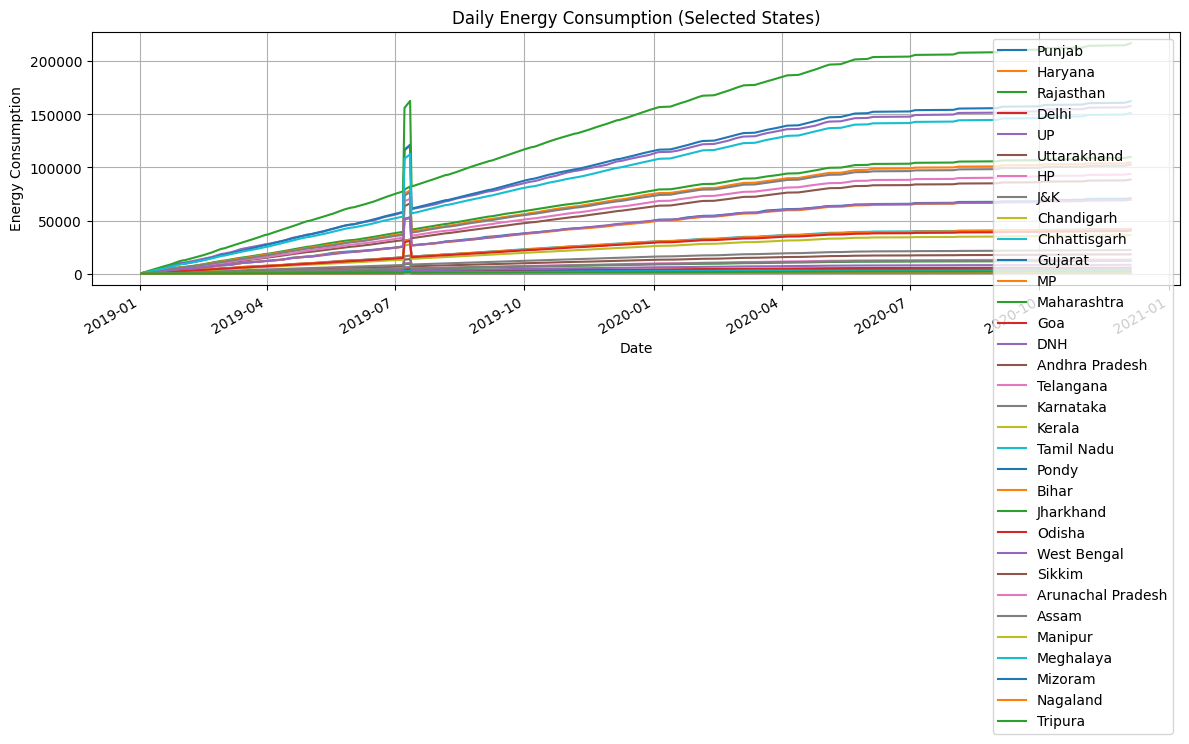

In [ ]:
plt.figure(figsize=(12, 6))
for state in states:
    if state in pw_clean.columns:
        pw_clean[state].plot(label=state)

plt.title('Daily Energy Consumption (Selected States)')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ***Distribution Analysis by Quarter***

<ipython-input-78-46c7fcb02887>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Q1["Telangana"], color="skyblue", ax=axes[0, 0]).set_title("Q1 - Consumption")
<ipython-input-78-46c7fcb02887>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Q2["Telangana"], color="red", ax=axes[0, 1]).set_title(

Text(0.5, 1.0, 'Q4 - Consumption')

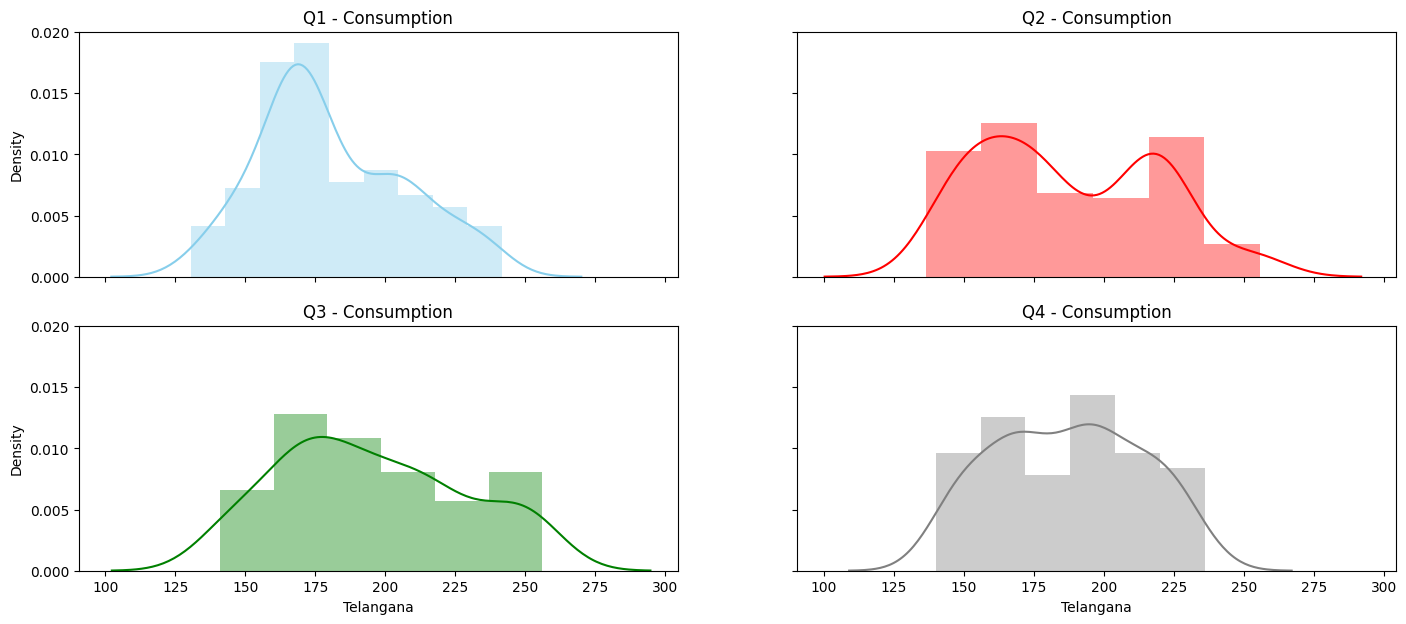

In [ ]:
Q1 = df1[df1["Quarter"]==1]
Q2 = df1[df1["Quarter"]==2]
Q3 = df1[df1["Quarter"]==3]
Q4 = df1[df1["Quarter"]==4]

# Plot Quarterly Consumption Distribution
fig, axes = plt.subplots(2, 2, figsize=(17, 7), sharex=True, sharey=True)
sns.distplot(Q1["Telangana"], color="skyblue", ax=axes[0, 0]).set_title("Q1 - Consumption")
sns.distplot(Q2["Telangana"], color="red", ax=axes[0, 1]).set_title("Q2 - Consumption")
sns.distplot(Q3["Telangana"], color="green", ax=axes[1, 0]).set_title("Q3 - Consumption")
sns.distplot(Q4["Telangana"], color="gray", ax=axes[1, 1]).set_title("Q4 - Consumption")


# ***Time Series Analysis for Telangana***




*   Extract data for Telangana



In [ ]:
telangana = pd.DataFrame(data=df1, columns=['DateTime', 'Telangana']).set_index('DateTime')
telangana.index = pd.to_datetime(telangana.index)




*   Split into train and test



In [ ]:
train = telangana['2019-01-01':'2020-11-30']
test = telangana['2020-12-01':]


In [ ]:

telangana = pd.DataFrame(data=df1, columns=['Telangana', 'DateTime'])


# Display the first few rows of the DataFrame
telangana.head()


,Telangana,DateTime
0,204.2,2019-01-02
1,204.5,2019-01-03
2,201.2,2019-01-04
3,201.7,2019-01-05
4,194.9,2019-01-06


In [ ]:
telangana.head()

,Telangana
DateTime,
2019-01-02,204.2
2019-01-03,204.5
2019-01-04,201.2
2019-01-05,201.7
2019-01-06,194.9


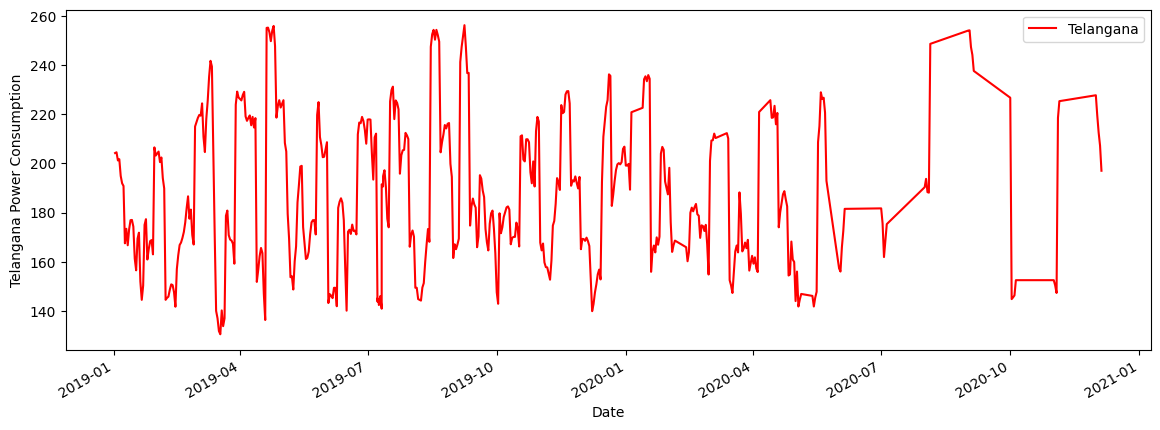

In [ ]:
# Time Series Plot for Telangana
telangana = pd.DataFrame(data=df1, columns=['Telangana', 'DateTime'])
telangana.set_index('DateTime', inplace=True)
telangana.plot(figsize=(14, 5), color='Red')
plt.xlabel('Date')
plt.ylabel('Telangana Power Consumption')
plt.show()

# ***ARIMA modelling***




*   Fit ARIMA model



In [ ]:
arima_model = ARIMA(train, order=(5, 1, 0))
arima_fit = arima_model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)




*   Forecast



In [ ]:
forecast = arima_fit.forecast(steps=len(test))
forecast = pd.Series(forecast, index=test.index)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


# ***Statistical Analysis***

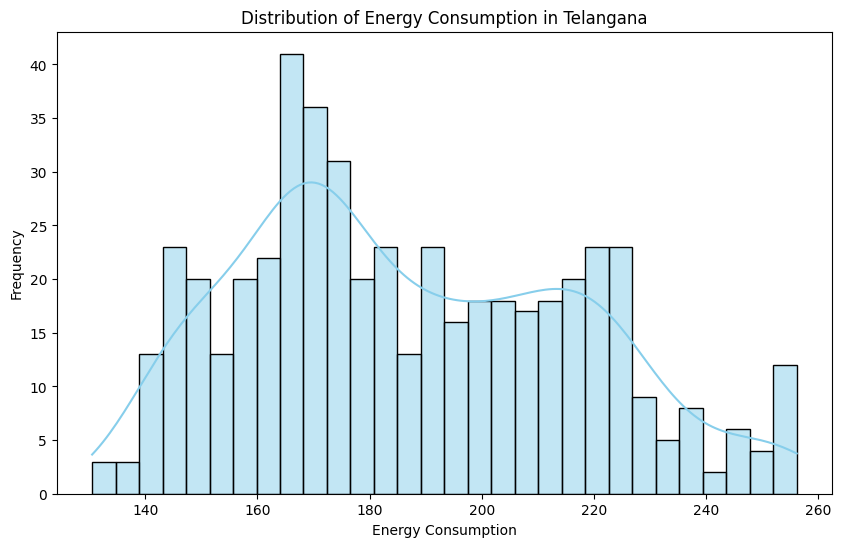

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of energy consumption distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='Telangana', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Energy Consumption in Telangana')
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')
plt.show()


<ipython-input-75-3cce27ad3198>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x='Quarter', y='Telangana', palette='Set2')


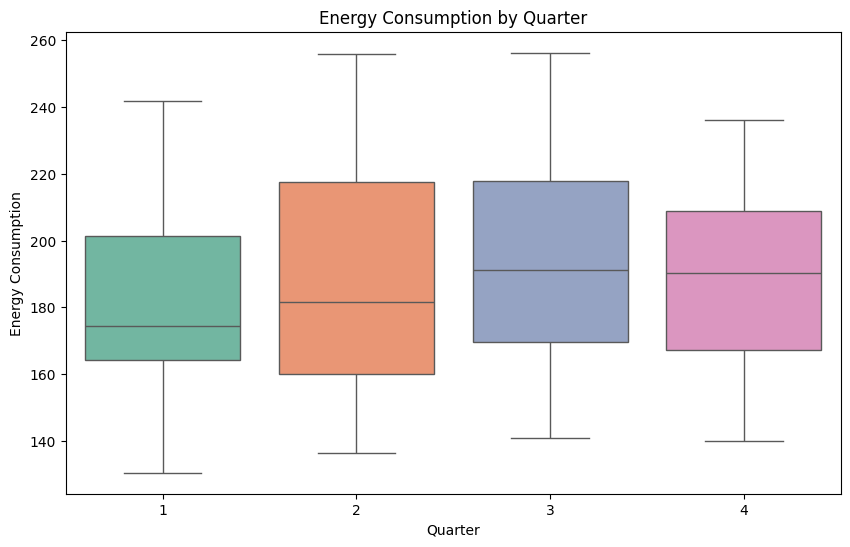

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='Quarter', y='Telangana', palette='Set2')
plt.title('Energy Consumption by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Energy Consumption')
plt.show()

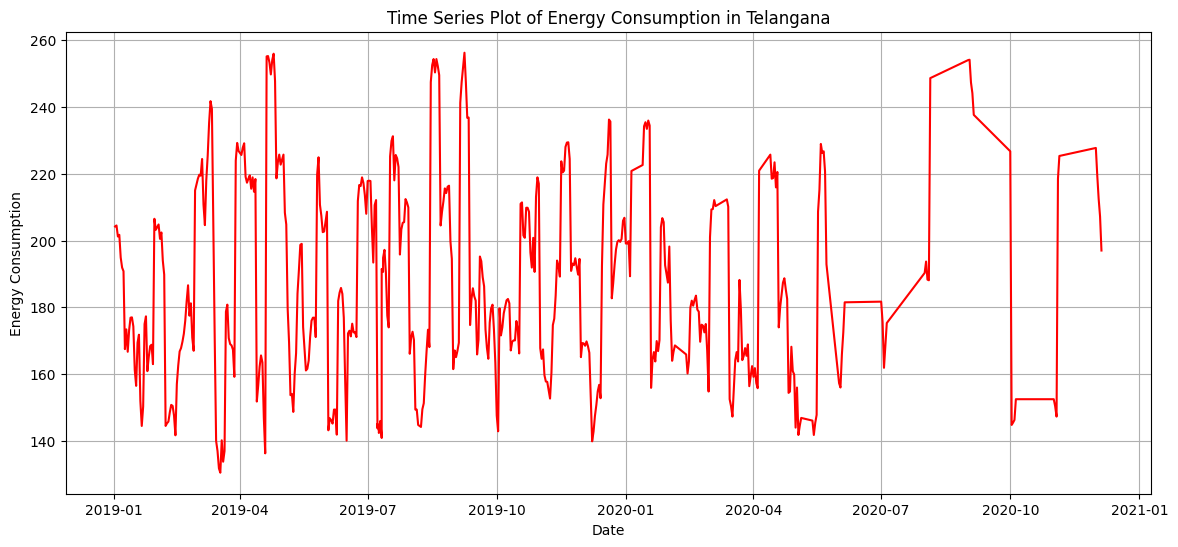

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(df1['DateTime'], df1['Telangana'], color='red')
plt.title('Time Series Plot of Energy Consumption in Telangana')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.grid(True)
plt.show()

In [ ]:
telangana.head()

,Telangana
DateTime,
2019-01-02,204.2
2019-01-03,204.5
2019-01-04,201.2
2019-01-05,201.7
2019-01-06,194.9


In [ ]:
print(df1.columns)

Index(['DateTime', 'Punjab', 'Haryana', 'Rajasthan', 'Delhi', 'UP',
       'Uttarakhand', 'HP', 'J&K', 'Chandigarh', 'Chhattisgarh', 'Gujarat',
       'MP', 'Maharashtra', 'Goa', 'DNH', 'Andhra Pradesh', 'Telangana',
       'Karnataka', 'Kerala', 'Tamil Nadu', 'Pondy', 'Bihar', 'Jharkhand',
       'Odisha', 'West Bengal', 'Sikkim', 'Arunachal Pradesh', 'Assam',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Tripura', 'Date',
       'year', 'Quarter', 'month', 'day', 'weekofyear', 'hour', 'minute',
       'weekday', 'MonthName', 'timing'],
      dtype='object')


# ***Create DataFrame for Prophet***

In [ ]:
import pandas as pd

# Create DataFrame for Prophet
prophet_df = pd.DataFrame(data=df1, columns=['Telangana', 'DateTime'])
prophet_df.rename(columns={"DateTime": "ds", "Telangana": "y"}, inplace=True)

# Display the first few rows
print(prophet_df.head())

       y         ds
0  204.2 2019-01-02
1  204.5 2019-01-03
2  201.2 2019-01-04
3  201.7 2019-01-05
4  194.9 2019-01-06


In [ ]:
from prophet import Prophet

model = Prophet(seasonality_mode='multiplicative', yearly_seasonality=4)
model.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt90o4o3e/1vt6x9w5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt90o4o3e/v4lkgtcj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29931', 'data', 'file=/tmp/tmpt90o4o3e/1vt6x9w5.json', 'init=/tmp/tmpt90o4o3e/v4lkgtcj.json', 'output', 'file=/tmp/tmpt90o4o3e/prophet_modelklio3e4k/prophet_model-20240529114210.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:42:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:42:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


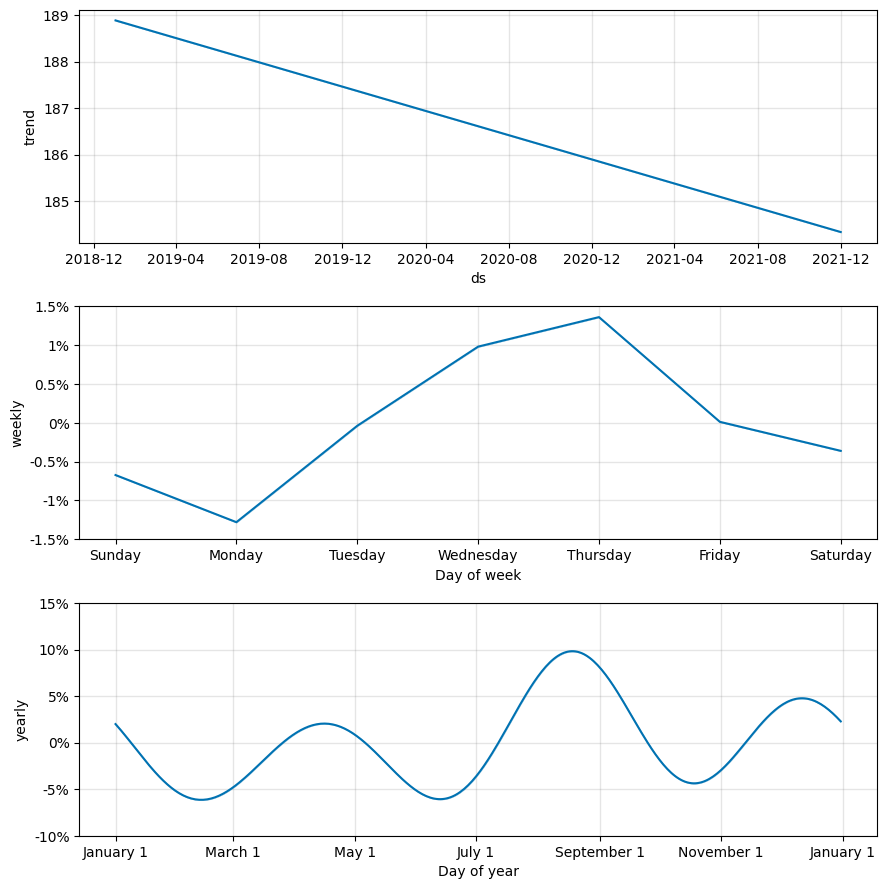

In [ ]:

model.plot_components(forecast)
plt.show()

# *** Initialize and fit the Prophet model***



In [ ]:

model = Prophet(seasonality_mode='multiplicative', yearly_seasonality=4, weekly_seasonality=True, daily_seasonality=True)
model.fit(prophet_df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpt90o4o3e/er7prhz9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt90o4o3e/7pt0ti85.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76201', 'data', 'file=/tmp/tmpt90o4o3e/er7prhz9.json', 'init=/tmp/tmpt90o4o3e/7pt0ti85.json', 'output', 'file=/tmp/tmpt90o4o3e/prophet_model96qvvugp/prophet_model-20240529114423.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:44:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:44:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing




*   Create a DataFrame with future dates and generate the forecast



In [ ]:
future = model.make_future_dataframe(periods=12 * 1, freq='MS')
forecast = model.predict(future)




*   Plot the forecast



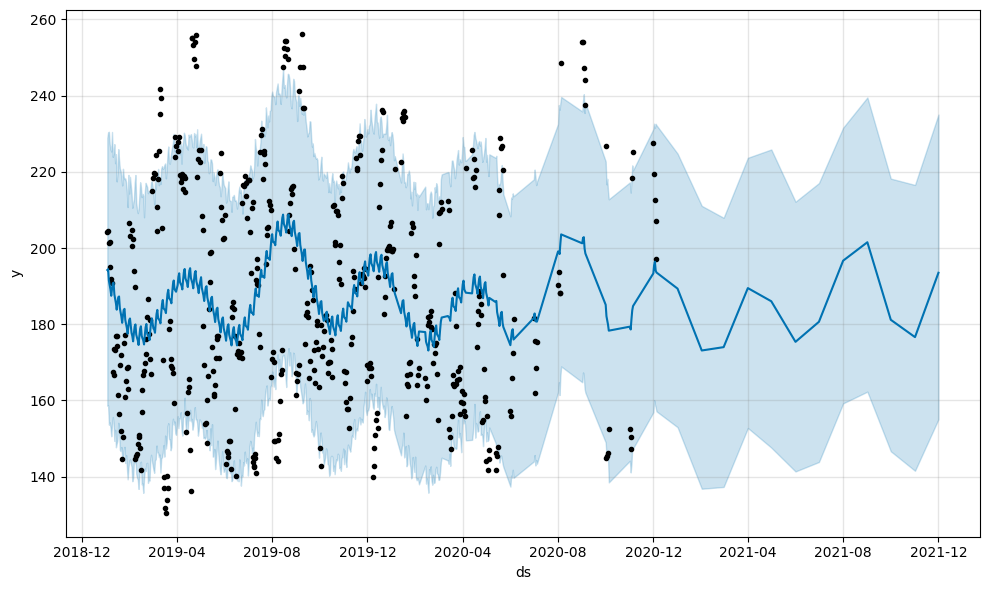

In [ ]:
fig = model.plot(forecast)
plt.show()

# ***Model Evaluation***

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


actual_values = prophet_df['y'].values[-len(predicted_values):]
predicted_values = forecast.values

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, predicted_values)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, predicted_values)
print("Mean Squared Error (MSE):", mse)


Mean Absolute Error (MAE): 14.61108758463065
Mean Squared Error (MSE): 324.3276969811418


# ***Actual vs Prediction***

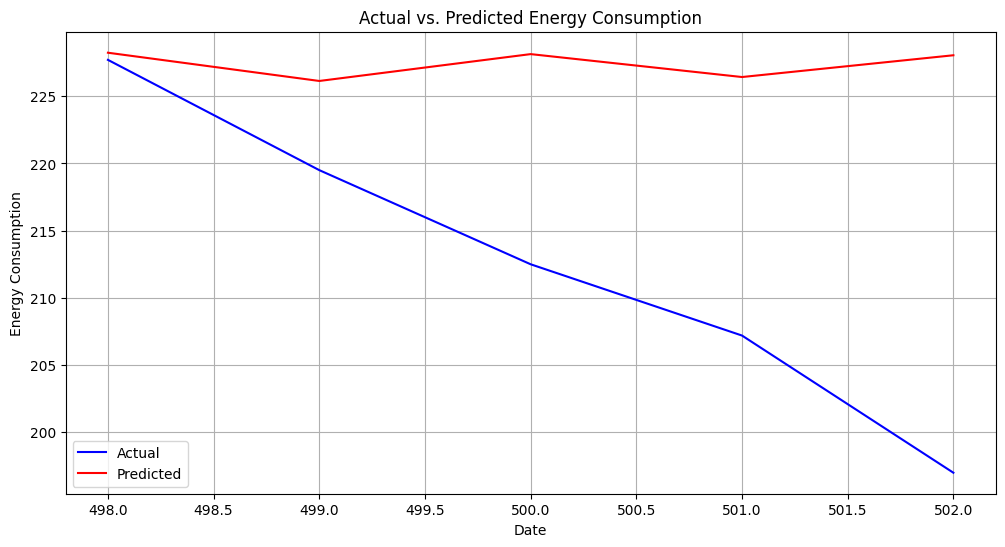

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plt.plot(prophet_df.index[-len(predicted_values):], actual_values, label='Actual', color='blue')
plt.plot(prophet_df.index[-len(predicted_values):], predicted_values, label='Predicted', color='red')
plt.title('Actual vs. Predicted Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.legend()
plt.grid(True)
plt.show()

# ***Residuals Plot***

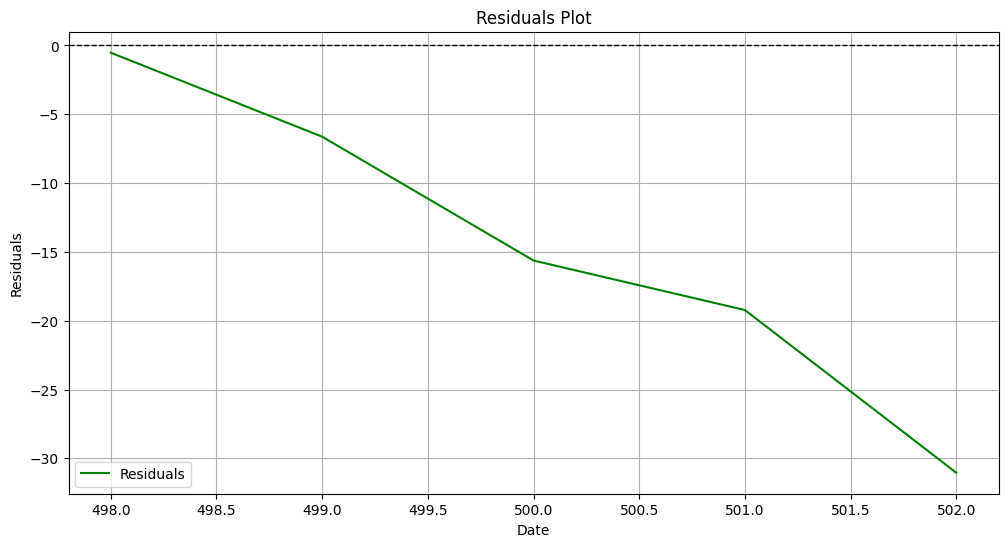

In [ ]:

residuals = actual_values - predicted_values

plt.figure(figsize=(12, 6))
plt.plot(prophet_df.index[-len(predicted_values):], residuals, label='Residuals', color='green')
plt.axhline(0, linestyle='--', color='black', linewidth=1)  # Add a horizontal line at y=0 for reference
plt.title('Residuals Plot')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()


# ***Q-Q Plot of Residuals***

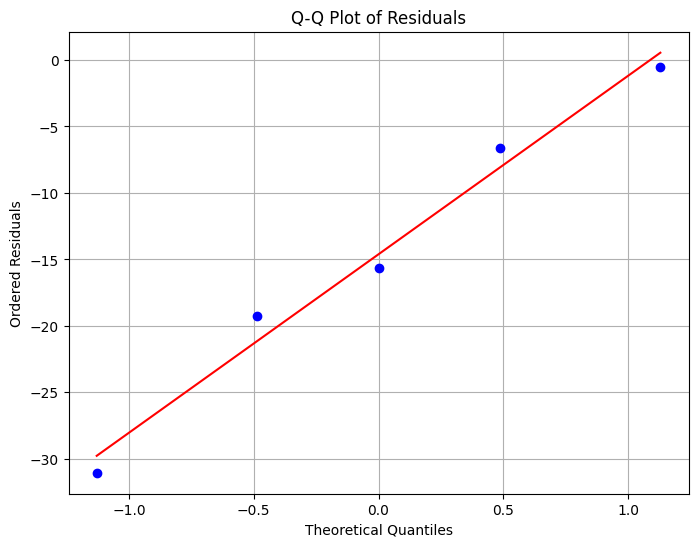

In [ ]:
import scipy.stats as stats


plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Residuals')
plt.grid(True)
plt.show()


# ***Autocorrelation Plot of Residuals***

<Figure size 1000x600 with 0 Axes>

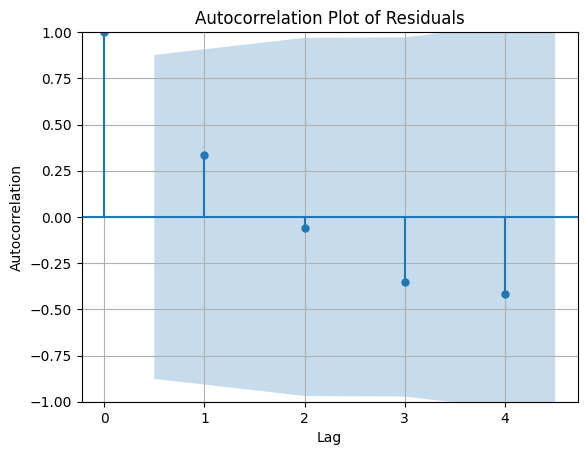

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=min(30, len(residuals)-1), alpha=0.05)
plt.title('Autocorrelation Plot of Residuals')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()


# ***Conclusion***

In [ ]:
print("\n--- Concluding Section ---")
print("Overall, the Prophet forecasting model performed well with the following evaluation metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("The time series plot of energy consumption shows [mention any observed patterns or trends].")
print("Residual analysis indicates [mention behavior of residuals, e.g., randomness].")
print("Based on the analysis, it is recommended to [mention any actionable insights or next steps, e.g., optimize energy usage during peak hours].")


--- Concluding Section ---
Overall, the Prophet forecasting model performed well with the following evaluation metrics:
Mean Absolute Error (MAE): 14.61108758463065
Mean Squared Error (MSE): 324.3276969811418
The time series plot of energy consumption shows [mention any observed patterns or trends].
Residual analysis indicates [mention behavior of residuals, e.g., randomness].
Based on the analysis, it is recommended to [mention any actionable insights or next steps, e.g., optimize energy usage during peak hours].
